In [ ]:

'''
NOTES FROM WESELEY 

Get HD file names using glob
use for loop to read files in 
truncate data to exclude voltages outside of marks 
create wavelengths using linspace between marks 
Find top of peaks (delta lambda between them) 


Normalize before 
Guess parameters (A1 = 1; A2 = 2 initial guess; mu1 and mu2 correspond to lambda H and lambda D (use peaks for guesses; to get peaks, 
use scipy.signal.findpeaks(); mu1 = lambda[peaks[0]]; sigma is width of peak) 
plot data
plot fit 
plot peaks  
use model A1 exp (- x)...ect. 
'''

'\nNOTES FROM WESELEY \n\nGet HD file names using glob\nuse for loop to read files in \ntruncate data to exclude voltages outside of marks \ncreate wavelengths using linspace between marks \nFind top of peaks (delta lambda between them) \n\n\nNormalize before \nGuess parameters (A1 = 1; A2 = 2 initial guess; mu1 and mu2 correspond to lambda H and lambda D (use peaks for guesses; to get peaks, \nuse scipy.signal.findpeaks(); mu1 = lambda[peaks[0]]; sigma is width of peak) \nplot data\nplot fit \nplot peaks  \nuse model A1 exp (- x)...ect. \n'

#LAB 2 Notebook (HD lab) 

#Author: Kyle Sprague 
#Contact: ksprague2020@gmail.com 
#Date: 2/12/2023 

There are multiple aims of this analysis. Looking at the spectra from hydrogen and deuterium, we will extract $\Delta{\lambda}$, which corresponds to the width between the deuterium and hydrogen peaks. We will then use this $\Delta{\lambda}$ value to calculate the mass of a neutron. Four trials were performed at each Hydrogen wavelength and three wavelengths were evaluated, which gives us a total of 12 $\Delta{\lambda}$ values. Thus, the process for computing $\Delta{\lambda}$ and $m_n$ (neutron mass) is functionalized. 

Data can be found at the following link: 
https://drive.google.com/drive/folders/1sR7cY56fe5kfsrw_YDnYybjIwRisTFZT 

##COPIED FROM GOOGLE DOCS LAB NOTEBOOK: 

Process for computing hydrogen wavelengths to 0.1 $Å$ precision. 

To compute the hydrogen wavelengths used as part of the analysis, we consider the Bohr model of the hydrogen atom. We have an electron orbiting around a nucleus of mass $m_e$ and angular momentum $\vec{L} = n\hbar$ where $n$ corresponds to the energy level. Bohr's model assumes perfect circular orbits with Coulomb force

\begin{equation} 
F_c = \frac{kZe^2}{r^2}
\end{equation} 

where $r$ is the radius of the orbit, k is Coulomb's constant, $+Ze$ represents the electron charge and we have $e^2$ because we have two charges.   

Recall that angular momentum is also defined as: 

\begin{equation} 
\vec{L} = m_evr 
\end{equation} 

such that 

\begin{equation} 
r = \frac{L}{m_ev} \
= \frac{n \hbar}{m_ev}. 
\end{equation}

This implies that

\begin{equation}
F_{centripetal} = F_c 
\begin{equation}

\begin{equation}  
\frac{r}{m_e v^2} = \frac{kZe^2}{r^2}
\end{equation} 

and 

\begin{equation} 
r = \frac{kZe^2}{m_ev^2} \\  
=\frac{kZe^2}{m_e(\frac{n\hbar}{rm_e})^2} \\
= \frac{r^2 k Ze^2 m_e}{(n\hbar)^2}
\end{equation}

\begin{equation}   
= \frac{(n\hbar)^2}{ k Ze^2 m_e}.
\end{equation}

Plugging in to the above to find v, we have 
\begin{equation}
\frac{n \hbar}{m_e v} = \frac{(n\hbar)^2}{ k Ze^2 m_e}
\end{equation} 

\begin{equation} 
v = \frac{kZe^2}{n \hbar}.
\end{equation}

Thinking in terms of overall energy for an orbital, we can write  

\begin{equation}
E = U + T
\end{equation} 
where 

\begin{equation}
E_1 = \frac{-kZe^2}{r} + \frac{mv^2}{2} \\ 
= \frac{-kZe^2}{\frac{(n\hbar)^2}{ k Ze^2 m_e}} + \frac{m\left(\frac{kZe^2}{n \hbar} \right)^2}{2} \\
\end{equation} 

\begin{equation}  
= \frac{-(kZe^2)^2 m_e}{(n \hbar)^2} + \frac{m_e(kze^2)^2}{2 (n \hbar)^2}
\end{equation} 

\begin{equation} 
= \frac{-2(kZe^2)^2 m_e}{2(n \hbar)^2} + \frac{m_e(kze^2)^2}{2 (n \hbar)^2} \\
= -\frac{(kZe^2)^2 m_e}{2(n \hbar)^2}.
\end{equation}

Consider now that that the energy for a photon is given by 

\begin{equation}
E_2 = \frac{hc}{\lambda} 
\end{equation} 

This implies that the above energies can be set equal such that 

\begin{equation}  
E_2 = E_1 \\
\frac{hc}{\lambda} = \frac{(ke^2)^2 m_e}{2(\hbar)^2} \left( -\frac{1}{n_f^2} + \frac{1}{n_i^2} \right) \\
= R_{\infty} \left( -\frac{1}{n_f^2} + \frac{1}{n_i^2} \right) 
\end{equation}  
where $R_{\infty} = 1.09737 \times 10^7 m^{-1}$. The source for the above derivation is "1. Atomic Structure and Atomic Radiation" by J.E. Turner. The Balmer series corresponds to $n_f = 2$. Plugging in $n_f = 2$ for $n_i = 1, 2, 3$, we obtain the hydrogen lines we used during our experimentation after a unit conversion from $m$ to $Å$.  

$\lambda_{3 \rightarrow 2} = 6561.1 Å $

$\lambda_{4 \rightarrow 2} = 4860.1 Å $

$\lambda_{5 \rightarrow 2} = 4339.4 Å$ 

Note: using Anntonia's version of the equation we used slightly different values.

##IGNORE BELOW INFO IN THIS LINE; it is incorrect

An electron in orbit for a single electron atom can be replaced by a reduced mass particle $\mu_D$ (reduced mass of deuterium) or $\mu_H$ in models of the hydrogen atom. The equation

\begin{equation}  
\frac{1}{\lambda} = \frac{(kZe^2)^2 \mu_H}{2( \hbar)^2 hc} \left( -\frac{1}{n_i^2} + \frac{1}{n_f^2} \right)
\end{equation}  

will yield the same results for Balmer series wavelengths of hydrogen. For deuterium, we have to used the reduced mass equation  

\begin{equation}  
\frac{1}{\lambda} = \frac{(kZe^2)^2 \mu_D}{2( \hbar)^2 hc} \left( -\frac{1}{n_i^2} + \frac{1}{n_f^2} \right)
\end{equation} 

where 

\begin{equation}
\mu_D = \frac{m_e m_D}{m_e + m_D}.
\end{equation}  


The mass of deuterium is $2.014 amu$ (source: https://www.sciencedirect.com/topics/earth-and-planetary-sciences/deuterium#:~:text=The%20atomic%20number%20of%20deuterium,be%20given%20as%202.014%20amu). This tells us that the mass in kg of deuterium is $3.344325 \times 10^{27} kg$. $\mu_D$ in kg is then 

\begin{equation}
\mu_D = 9.10690313\times 10^{-31} kg
\end{equation} 

To avoid plugging in all the constants associated with the above equation, we can employ the Rydber constant multiplied by the ratio of the reduced mass for deuterium over the mass of the electron such that our equation for the Deuterium wavelengths becomes: 

\begin{equation} 
\frac{1}{\lambda} = R_{\infty} \frac{\mu_D}{m_e} \left( -\frac{1}{n_f^2} + \frac{1}{n_i^2} \right). 
\end{equation} 

From this we obtain the deuterium wavelengths for the first three lines in the Balmer series 

$\lambda_{3 \rightarrow 2} = 6562.9 Å$

$\lambda_{4 \rightarrow 2} = 4861.4 Å$

$\lambda_{5 \rightarrow 2} = 4340.6 Å$.

We find that the results differ by approximately 1 $Å$. This small change is expected given the similarity between the reduced mass and the mass of an electron for hydrogenic atoms. 


In [ ]:
#package installation 

!pip3 install lmfit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 1.3 MB/s eta 0:00:00


##1: Steps for Data Analysis: 

Our preliminary aim is to construct a double Gaussian model for the Hydrogen and Deuterium wavelengths such that we can obtain a value for uncertainty in model paramters.

1. import relevant libraries 
2. Truncate data to exclude voltages outside of the marking points as chosen during the experiment. The marking points will be at select wavelengths where the run was started and ended while the target data point listed in the file name corresponds to the wavelength of hydrogen for which we were seeking a peak. 
3. Fill in empty wavelengths between markings 
4. Normalize the data
5. Find the top of our peaks and extract \delta{\lambda} for the hydrogen and deuterium peaks at a specific target wavelength 

Our secondary goal is to construct a model from which we can extract uncertainties for relevant parameters. 

6. Create a model with A1 = 1 and A2 = 2 as an initial guess and also guess $\mu_1 = {\lambda_h}$ and $\mu_2 ={\lambda_D}$; the model type is of the form: 
\begin{equation} 
A_1e^{-0.5((x-mu_1)/(\sigma_1))^2} + A_2e^{-0.5((x-mu_2)/(\sigma_2))^2} +c
\end{equation} 

7. Plot data 
8. Plot fit 


##CODE FOR GOAL 1 (STEPS 1-5)

In [ ]:
#IMPORTING RELEVANT LIBRARIES 

import glob 
import numpy as np 
import pandas as pd  
import lmfit as lm
import scipy 
import matplotlib.pyplot as plt 
from google.colab import drive  
import scipy.signal as signal 
from scipy import stats
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#READING IN THE DATA 


keys = ["6564.7", "4341.7", "4862.7", "Helium"]
all_files= glob.glob("/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/*csv")
print(len(all_files))

def create_data_lists(files: list, keys: list) -> tuple: 
  ''' 
    Function to organize file paths into lists depending on their name contents. As such, 
    we have 3 lists for Hydrogen corresponding to 6564.7 Angstroms, 4341.7 Angstroms, and 
    4862.7 Angstroms (3 -> 2 Balmer, 5->2 Balmer, and 4->2 Balmer lines, respectively). The Helium 
    list contains all wavelengths where one trial was conducted for each.

    Parameters:  
      str -- files: a string of file names from glob.glob  
      str -- keys: a string of keys that are used to identify particular files 

    Returns: 
      A tuple of four lists of file paths with each list corresponding to a wavelength type or all Helium wavelengths


  '''
  H1_list = []; H2_list = []; H3_list = []; He_list = []
  for i in range(len(files)):  
    if files[i][55:61] == keys[0]: #because we formatted all our file names the same, 55:61 corresponds to keys[0], keys[1], or keys[2] for all files excl. He files
      H1_list.append(files[i])
    elif files[i][55:61] == keys[1]:  
      H2_list.append(files[i])
    elif files[i][55:61] == keys[2]:  
      H3_list.append(files[i])
    else: 
        He_list.append(files[i])   
  return (H1_list, H2_list, H3_list, He_list) 

def augment_data_lists(list_of_files: list) -> list:  
  '''
      A function that takes in lists of file paths and convert them into lists of data_frames 

      parameters: 

      list -- list_of_files: a list of file paths corresponding to a particular wavelength trial

      Returns: 
        A list of data frames for a particular wavelength with each data frame corresponding to a trial or the list of all Helium wavelengths
  '''
  new_list = [] 
  for i in range(len(list_of_files)): 
    new_list.append(pd.read_csv(list_of_files[i]))  
  return new_list #gives back a list of data frames


H1_list, H2_list, H3_list, He_list = create_data_lists(all_files, keys) #these add to the full number of files read in  
print(H1_list) 
print(H2_list) 
print(H3_list)
print(He_list) 
#HELIUM WAVELENGTH ORDER: 7280, 5010, 6680, 4470, 3880, 7060, 7780, 5880
H1_df_list = augment_data_lists(H1_list); H2_df_list = augment_data_lists(H2_list); H3_df_list = augment_data_lists(H3_list) 
He_df_list = augment_data_lists(He_list)
 

20
['/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_6564.7_Slit_25um_Tri5.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_6564.7_Slit_25um_Tri2.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_6564.7_Slit_25um_Tri4.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_6564.7_Slit_25um_Tri3.csv']
['/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4341.7_Slit_20um_Tri4.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4341.7_Slit_20um_Tri2.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4341.7_Slit_20um_Tri3.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4341.7_Slit_20um_Tri1.csv']
['/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4862.7_Slit_25um_Tri1.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4862.7_Slit_25um_Tri2.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4862.7_Slit_25um_Tri4.csv', '/content/drive/MyDrive/Sprague | 231/L_2/L_2_Data/Wave_4862.7_Slit_25

In [ ]:
#TRUNCATING THE DATA AND CREATING A WAVELENGTH LINSPACE

def truncation_func(data_frame_list: list) -> list: 
  '''
  Function that eliminates all voltages prior to the first marking and after the second marking

  Parameters: 
    list -- data_frame_list: a data frame list

  Returns: 
    list of dataframes where each dataframe begins with the first mark and ends with the last mark
  '''
  truncated_dfs = []  
  for i in range(len(data_frame_list)):  
    #print(data_frame_list[i])
    boolean_series = data_frame_list[i]["Marks"].notnull() #create a boolean series (a mask)
    reduced_series = boolean_series[boolean_series].index.values  #access values where marks exist
    #print(reduced_series)
    truncated_dfs.append(data_frame_list[i].truncate(before = reduced_series[0], after = reduced_series[1]).reset_index())  #slice out all 
    #false values before the first mark and after the last mark, then reset the index
  return truncated_dfs 

truncated_He_list = truncation_func(He_df_list) #list for various wavelengths with all voltages outside the marks removed for each wavelength (one sublist = 1 wavelength)
truncated_H1_list = truncation_func(H1_df_list) #list for 6564.7 Angstroms with all voltages outside the marks removed (one sublist = 1 trial)
truncated_H2_list = truncation_func(H2_df_list) #list for 4341.7 Angstroms with all voltages outside the marks removed (one sublist = 1 trial)
truncated_H3_list = truncation_func(H3_df_list) #list for 4862.7 Angstroms with all voltages outside the marks removed (one sublist = 1 trial)

def index_grabber(data_frame: "Pandas.DataFrame") -> "Pandas.Series": 
  ''' 
      A function that returns a series object with two values that can be indexed which 
      correspond to the indeces of the first and last row for a given dataframe. 

      Parameters: 
        Pandas.DataFrame -- data_frame: A pandas data frame that has already been truncated 

      Returns: 
        Pandas.Series object with two indeces corresponding to the beginning and end rows 
        of a given dataframe 
  '''

  #boolean_series = data_frame["Marks"].notnull() 
  #reduced_series = boolean_series[boolean_series == True].index.values  
  #print(reduced_series)
  reduced_series = [0, len(data_frame) - 1] 
  return reduced_series 

def inter_df_linspace(data_frame: "Pandas DataFrame") -> "Pandas.DataFrame":  
  '''
    This function creates a linspace for a given data_frame that has been truncated 

    Paramters: 
      Pandas.dataframe -- data_frame: A data frame object for a given wavelength

    Returns: 
      A new dataframe with a linspace between the start and end values
  '''
  start_val, stop_val = index_grabber(data_frame)[0], index_grabber(data_frame)[1] 
  #print(data_frame)
  #print(start_val, stop_val)
  rows = data_frame.shape[0]    
  linspace_values = np.linspace(data_frame['Marks'][start_val], data_frame['Marks'][stop_val], stop_val + 1)
  new_dict = {"Marks": linspace_values, "Intensity(V)": np.array(data_frame["Intensity(V)"])} 
  return pd.DataFrame(new_dict) 

H1_df_list_with_linspace = [] 
H2_df_list_with_linspace = [] 
H3_df_list_with_linspace = [] 
He_df_list_with_linspace = [] 

for i in range(len(truncated_H1_list)):
  H1_df_list_with_linspace.append(inter_df_linspace(truncated_H1_list[i])) 
  H2_df_list_with_linspace.append(inter_df_linspace(truncated_H2_list[i])) 
  H3_df_list_with_linspace.append(inter_df_linspace(truncated_H3_list[i])) 

for i in range(len(truncated_He_list)):
  He_df_list_with_linspace.append(inter_df_linspace(truncated_He_list[i])) 
  
  

In [ ]:
#manual removal of problematic peak for h2_df trial 2 

#this value is noise in the data that skews the normalization such that the data is normalized to this peak. 
#we need to reassign the second voltage value in the df to 0.013943 (a nearby value that makes sense) 

#print(H2_df_list_with_linspace[1]) #problematic point is at 1,1 
var = H2_df_list_with_linspace[1]["Intensity(V)"].replace([0.019690], 0.013943)  
H2_df_list_with_linspace[1]["Intensity(V)"] = var 

In [ ]:
#normalizing the data 
def normalization_func(df: "Pandas.DataFrame") -> "Pandas.DataFrame":  
  ''' 
    Function that normalizes a given data frame's voltage column

    Pandas.DataFrame -- df: A dataframe corresponding to a given wavelength 

    Returns: A normalized version of the input data frame object 

  '''
  voltage_array = np.array(df["Intensity(V)"])
  #print(voltage_array)
  voltage_array = voltage_array - np.amin(voltage_array)
  #print(voltage_array)
  max_voltage = np.amax(voltage_array) 
  #print(max_voltage)   
  new_voltage_array = voltage_array / max_voltage  

  #print(new_voltage_array)
  new_normalized_df = {"Marks": np.array(df["Marks"]), "Intensity(V)": new_voltage_array}
  return pd.DataFrame(new_normalized_df) 

normalized_H1_df_list = [] 
normalized_H2_df_list = [] 
normalized_H3_df_list = [] 
normalized_He_df_list = [] 


for i in range(len(truncated_H1_list)):
  normalized_H1_df_list.append(normalization_func(H1_df_list_with_linspace[i])) 
  normalized_H2_df_list.append(normalization_func(H2_df_list_with_linspace[i])) 
  normalized_H3_df_list.append(normalization_func(H3_df_list_with_linspace[i])) 

for i in range(len(He_df_list_with_linspace)):
  normalized_He_df_list.append(normalization_func(He_df_list_with_linspace[i]))




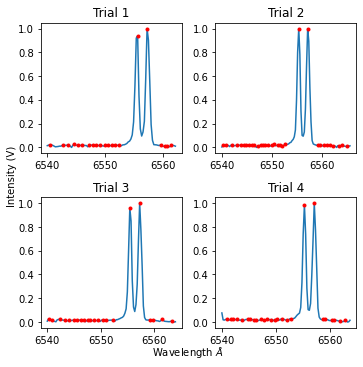

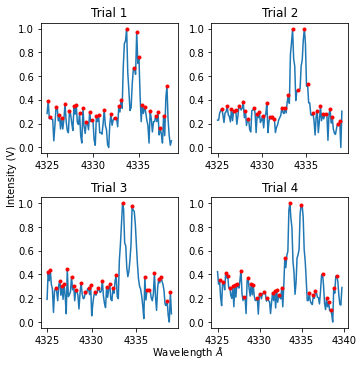

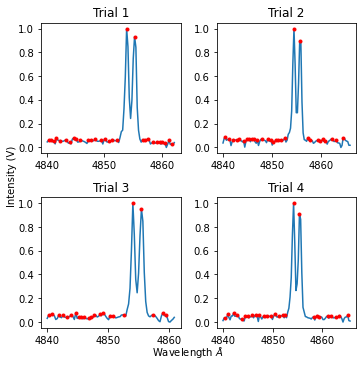

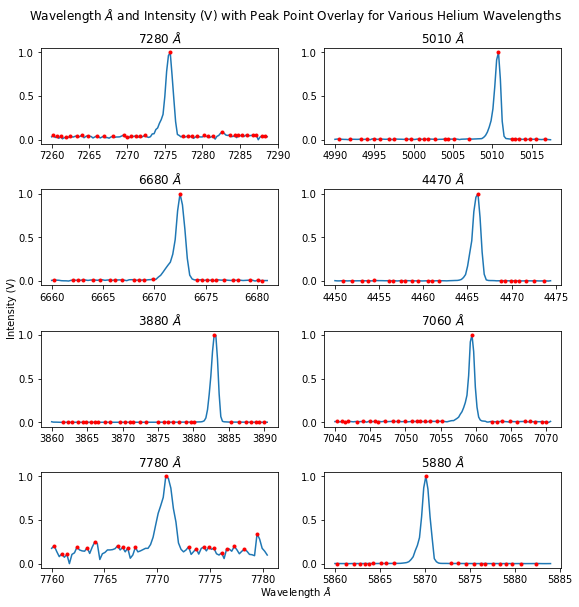

In [ ]:
#PLOTTING FOR PEAK IDENTIFICATION PART 1

#let's consider a single H1 data frame first 
consideration_frame = normalized_H1_df_list[0]

def getPeaks(data_frame: "Pandas Dataframe"): 
  ''' 
    Function that returns peaks associated with a wavelength, intensity plot 

    Parameters: 
      Pandas.Dataframe -- A Data frame object for a specific wavelength 
  '''
  return signal.find_peaks(np.array(data_frame["Intensity(V)"])) #returns ndarray of peaks  


#print(len(normalized_He_df_list))

def line_plotter(data_frame_list: list, wavelength_name: list): 
    '''The aim of this function is to create a plot for a given wavelength of H line/a
    a plot of all He lines. Each H plot will have 4 subplots whereas the He plot will 
    have 8 subplots   

    Parameters: 
      list -- data_frame_list: The list of normalized data frames  
      str -- wavelength_name: A string corresponding to the wavelength under consideration (unless the DF list is for Helium) 

    Returns: 
      None 
    '''
    hydrogen_trials = ["Trial 1", "Trial 2", "Trial 3", "Trial 4"] #trial names for plotting Hydrogen wavelengths 
    sub_plot_number = len(data_frame_list) 
    helium_wavelengths = ["7280", "5010", "6680", "4470", "3880", "7060", "7780", "5880"]

    #HYDROGEN DATA FRAME LISTS PLOTTING

    if sub_plot_number == 4: 
      fig, axs = plt.subplots(2,2, figsize = (5,5)) #create a subplot of two plots if there are only 4 data frames associated with a 
      #normalized df_list
      for i in range(len(axs.flat)): 
        trial_peaks = getPeaks(data_frame_list[i]) #for one df in the df list, this gets the peaks for that dataframe as row indeces
        #print(trial_peaks)
        #print(trial_peaks)
        ax = axs.flat[i] 
        ax.plot(data_frame_list[i]["Marks"], data_frame_list[i]["Intensity(V)"])  #plot the full range of data
        ax.set_title(hydrogen_trials[i]) 
        #print(data_frame_list[i]["Marks"][trial_peaks[0]])
        for j in range(len(trial_peaks[0])): 
          #print(data_frame_list[i]["Marks"][trial_peaks[0][j]])
          ax.plot(data_frame_list[i]["Marks"][trial_peaks[0][j]], data_frame_list[i]["Intensity(V)"][trial_peaks[0][j]], ".", color = "red") 
          #plot peaks as points using row indeces 
      fig.text(0.5, 0, r"Wavelength $Å$", ha='center', fontsize = 10) #create an axes title (x)
      fig.text(0, 0.5, r'Intensity (V)', va='center', rotation='vertical', fontsize = 10) #create an axes title (y) 
      #fig.text(0.5, 1, f"Wavelength $Å$ and Intensity (V) with Peak Point Overlay for Hydrogen {wavelength_name} $Å$", ha = 'center', fontsize = 12, fontweight = "medium")
      plt.tight_layout() 

    #HELIUM DATA FRAME LIST PLOTTING 

    else: 

        #Helium wavelengths measured 
        fig, axs = plt.subplots(4,2, figsize = (8,8)) #create a 4,2 subplot range (so 8 total) because we have 8 Helium dataframes
        for i in range(len(axs.flat)): 
          trial_peaks = getPeaks(data_frame_list[i]) #for one df in the df list, this gets the peaks for that dataframe as row indeces
          ax = axs.flat[i]   
          ax.plot(data_frame_list[i]["Marks"], data_frame_list[i]["Intensity(V)"]) 
          ax.set_title(f"{helium_wavelengths[i]} $Å$") 
          for j in range(len(trial_peaks[0])): 
            ax.plot(data_frame_list[i]["Marks"][trial_peaks[0][j]], data_frame_list[i]["Intensity(V)"][trial_peaks[0][j]], ".", color = "red") 
        
        fig.text(0.5, 0, r"Wavelength $Å$", ha='center', fontsize = 10) #create an axes title (x)
        fig.text(0, 0.5, r'Intensity (V)', va='center', rotation='vertical', fontsize = 10) #create an axes title (y) 
        fig.text(0.5, 1, f"Wavelength $Å$ and Intensity (V) with Peak Point Overlay for Various Helium Wavelengths", ha = 'center', fontsize = 12, fontweight = "medium")
        plt.tight_layout()    


def Gaussian(A1, A2):
  pass 

line_plotter(normalized_H1_df_list, keys[0]) 
#print("------------------------------------------------------------------------------------------") 
line_plotter(normalized_H2_df_list, keys[1])  
#print("------------------------------------------------------------------------------------------") 
line_plotter(normalized_H3_df_list, keys[2])  
#print("------------------------------------------------------------------------------------------") 
line_plotter(normalized_He_df_list, keys[3])

#peaks_for_H1 = getPeaks(consideration_frame) 
#mu_val1, mu_val2 = get_mu_vals(consideration_frame, peaks_for_H1) 




Now that we have plots of our peaks, we can create guesses for height, thus narrowing the number of points returned by the get peaks function and edging closer to finding best values for mu1 and mu2. After finding mu1 and mu2 we will need to make a guess for A1 and A2 for our model and then plot models for each data frame. Let's start with getting two values for each plot for mu1 and mu2.  



In [ ]:
#FINDING PEAK INDECES 

H1_peaks_list = [] 
H2_peaks_list = [] 
H3_peaks_list = [] 
He_peaks_list = []

def refined_get_peak(df: "Pandas.DataFrame", h: "Float or Int"):  
  ''' 
    This version of the getPeak function takes height values and peak distances 
    that are obtained by viewing the results from the line_plotter function 

    Parameters: 
    Pandas.DataFrame -- df: A data frame for a trial if Hydrogen or for a wavelength 
     if helium 
    float or int -- h: the lowest height at which both peaks can be seen 
    int -- peak_dist (default = False): the width that the peaks are separated 

    Returns: 
      A list containing arrays of peak values selected based on h and peak_dist
  ''' 
  #if not peak_dist:
  #  peak_dist = None
  #peaks = signal.find_peaks(np.array(df["Intensity(V)"]), height = h, distance = peak_dist)[0]
  #plt.figure()
  #plt.plot(np.array(df["Marks"]), np.array(df["Intensity(V)"]))
  #plt.plot(np.array(df["Marks"])[peaks], np.array(df["Intensity(V)"])[peaks], '*')
  #plt.title(h)
  return signal.find_peaks(np.array(df["Intensity(V)"]), height = h)[0]  



for i in range(len(normalized_H1_df_list)):
  #H1_peaks_list.append(refined_get_peak(normalized_H1_df_list[i], 0.08))
  H1_peaks_list.append(refined_get_peak(normalized_H1_df_list[i], 0.8))      

#print(H1_peaks_list) #this shows up as a list of 4 two element arrays -- which is what we want because 
#we should only have 8 total prominent peaks 


for i in range(len(normalized_H3_df_list)): 
  H3_peaks_list.append(refined_get_peak(normalized_H3_df_list[i], 0.8)) #prints desired peak number 


helium_heights = [0.8 for i in range(8)]
#print(helium_heights)
for i in range(len(helium_heights)): 
  He_peaks_list.append(refined_get_peak(normalized_He_df_list[i], helium_heights[i])) #prints desired peak number of 
  #8 since we have only one peak per helium wavelength 

#now for Hydrogen 4371.4 

H2_peaks_list.append(refined_get_peak(normalized_H2_df_list[0], 0.8)) 
H2_peaks_list.append(refined_get_peak(normalized_H2_df_list[1], 0.6))  
H2_peaks_list.append(refined_get_peak(normalized_H2_df_list[2], 0.8))  
H2_peaks_list.append(refined_get_peak(normalized_H2_df_list[3], 0.6))   


#print(H2_peaks_list) 

#FINDING MU VALUES USING PEAK INDECES 

def get_mu_vals(data_frame_list: list, peaks_list: list) -> list:
  '''
  Function that takes a data frame and associated peaks and creates 
  a list of wavelength values associated with the two peak values. If 
  helium, then only a single peak value is returned for each data frame. 

  Parameters: 
    list -- data_frame_list: a list of data frames for a given Hydrogen wavelength 
    or the entire list of helium wavelengths 

    list -- peaks_list: the highest peak(s) for each data_frame under consideration 

  returns  
    List with mu values sublists for each data frame
  '''

  big_mu_list = []
  for i in range(len(data_frame_list)): 
    #print(data_frame_list[i]["Marks"][peaks_list[i]])
    mu_sub_list = [] 
    for j in range(len(peaks_list[i])):
      mu_sub_list.append(data_frame_list[i]["Marks"][peaks_list[i][j]]) 
    big_mu_list.append(mu_sub_list) 
  return big_mu_list #this big_mu_list will contain a sublist of mu values for each data frame sublist (so trial) within 
  #the larger data frame list. For the hydrogen wavelengths we should have a list of len() = 4 with 4 sublists each of length 
  #2; the mu1 (lower value) will correspond to Deuterium while the mu2 (higher value) will correspond to Hydrogen; for Helium 
  #we should have a list of length 8 with eight sublists of length 1 

H1_df_mu_list = get_mu_vals(normalized_H1_df_list, H1_peaks_list)  
H2_df_mu_list = get_mu_vals(normalized_H2_df_list, H2_peaks_list) 
#print(H2_df_mu_list) 
H3_df_mu_list = get_mu_vals(normalized_H3_df_list, H3_peaks_list) 
He_df_mu_list = get_mu_vals(normalized_He_df_list, He_peaks_list) 
#print(He_df_mu_list)

##CODE FOR GOAL 2: Steps 6-8

<ipython-input-17-86d455786051>:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(data_frame["Intensity(V)"].to_numpy())[0][0]


0.01831993400883986
6557.292631578947
6557.140869565218
6557.307692307692
6557.163461538462
[[Model]]
    Model(gaussian_model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 96
    # variables        = 7
    chi-square         = 0.02531833
    reduced chi-square = 2.8448e-04
    Akaike info crit   = -777.095172
    Bayesian info crit = -759.144735
    R-squared          = 0.99386165
[[Variables]]
    A1:         0.96519049 +/- 0.01372183 (1.42%) (init = 1)
    A2:         0.99067814 +/- 0.01323142 (1.34%) (init = 1)
    mu_value1:  6555.52286 +/- 0.00492885 (0.00%) (init = 6555.657)
    mu_value2:  6557.39177 +/- 0.00498180 (0.00%) (init = 6557.293)
    sigma_1:    0.30168792 +/- 0.00499546 (1.66%) (init = 0.1)
    sigma_2:    0.32470493 +/- 0.00505422 (1.56%) (init = 0.1)
    c:          0.01984196 +/- 0.00186430 (9.40%) (init = 0.01831993)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, sigma_1) = -0.551

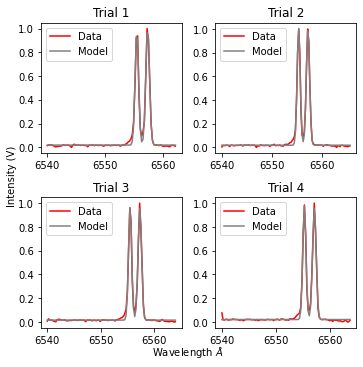

In [ ]:
#GETTING CHANGE IN WAVELENGTH BETWEEN PEAKS (DELTA LAMBDA) AND CREATING A MODEL PARAMETER GUESS GENERATOR 

def get_delta_lambda(mu_values: list) -> list: 
  if len(mu_values) != 2: 
    return mu_values #if we a re working with a helium wavelength, then just return that helium wavelength as the delta lambda value 
  else:  
    delta_lambda = mu_values[1] - mu_values[0]  
    return delta_lambda  

def restructure_mu_list(mu_list_one_wavelength): 
  #the goal of this function is to split a single mu list into two mu lists of mu_1 values (first mu val for a trial) and mu_2 values (second mu value for a trial) 
  #the overall length of each list will be four  
  mu_1_list = [] 
  mu_2_list = []
  #print(mu_list_one_wavelength)
  for i in range(len(mu_list_one_wavelength)): 
    for j in range(len(mu_list_one_wavelength[i])): 
      if j == 0: 
        mu_1_list.append(mu_list_one_wavelength[i][j]) 
      if j == 1: 
        mu_2_list.append(mu_list_one_wavelength[i][j]) 
        print(mu_list_one_wavelength[i][j])
  return mu_1_list, mu_2_list 

def get_c(data_frame: list) -> int: 
  return scipy.stats.mode(data_frame["Intensity(V)"].to_numpy())[0][0]

def gaussian_model_func(x, A1, A2, mu_value1, mu_value2, sigma_1, sigma_2, c): 
  return A1*np.exp(-0.5*((x-mu_value1)/(sigma_1))**2) + A2*np.exp(-0.5*((x-mu_value2)/(sigma_2))**2) + c 

c_guess_H1 = get_c(normalized_H1_df_list[0])   
print(c_guess_H1)
#print(c_guess_H1)
#print(np.exp((((normalized_H1_df_list[0]["Marks"].to_numpy()-H1_df_mu_list[0][0])/0.02)**2) * -0.5) * 1 + (np.exp((((normalized_H1_df_list[0]["Marks"].to_numpy()-H1_df_mu_list[0][0])/0.02)**2) * -0.5) * 2)+c_guess) 

#result = gaussian_model_func(normalized_H1_df_list[0]["Marks"].to_numpy(), 1, 2, H1_df_mu_list[0][0], H1_df_mu_list[0][1], 0.02, 0.02, get_c(normalized_H1_df_list[0]))
#print(result)
my_userfunc_model_H1 = lm.models.Model(gaussian_model_func) 

#MODEL 1

#print(H1_df_mu_list)
mu_1_list_H1, mu_2_list_H1 = restructure_mu_list(H1_df_mu_list)  
#print(mu_1_list_H1) #working
#print(mu_2_list_H1) #working

plot_legend_labels = ["Data", "Model"]
trial_nmes = ["Trial 1", "Trial 2", "Trial 3", "Trial 4"]
plot_line_styles = ["-", "--", '-.', ":"]
#we do not use weights because we do not have error associated with the y-values   

def line_plotter_with_models_H1(data_frame_list, trial_names, legend_info, model, mu_list_1, mu_list_2): 
    #FUNCTION WILL PLOT THE DATA AND MODELS AND RETURN ERROR INFORMATION

    fig, axs = plt.subplots(2,2, figsize = (5,5)) #create a subplot of two plots if there are only 4 data frames associated with a 
    #normalized df_list
    for i in range(len(axs.flat)): 
      #MODEL CONSTRUCTION
      my_userfunc_model_H1.set_param_hint('A1', value = 1, min = 0.5, max = 1.1) 
      my_userfunc_model_H1.set_param_hint('A2', value = 1, min = 0.5, max = 1.1)
      my_userfunc_model_H1.set_param_hint('mu_value1', value = mu_1_list_H1[i], min = 6000, max = 7000)  
      my_userfunc_model_H1.set_param_hint('mu_value2', value = mu_2_list_H1[i], min = 6000, max = 7000) 
      my_userfunc_model_H1.set_param_hint('c', value = c_guess_H1) 
      my_userfunc_model_H1.set_param_hint('sigma_1', value = 0.1, min = 0.0001)
      my_userfunc_model_H1.set_param_hint('sigma_2', value = 0.1, min = 0.0001) 
      my_params = my_userfunc_model_H1.make_params() 
      my_fit_result_H1 = my_userfunc_model_H1.fit(data = data_frame_list[i]["Intensity(V)"].to_numpy(), x = data_frame_list[i]["Marks"].to_numpy(), params = my_params)  
      y_fit_vals_H1 = my_fit_result_H1.eval(x = data_frame_list[i]["Marks"].to_numpy()) 
      print(my_fit_result_H1.fit_report()) 
      print("---------------------------------------------------------------------")

      ax = axs.flat[i]  
      #DATA PLOTTING
      ax.plot(data_frame_list[i]["Marks"], data_frame_list[i]["Intensity(V)"], color = "red")  #plot the full range of data
      
      #MODEL PLOTTING 
      ax.plot(data_frame_list[i]["Marks"].to_numpy(), y_fit_vals_H1, linestyle = "solid", color = "gray")  
      #MODEL ADDITIONAL INFO/ERROR 

      dely = my_fit_result_H1.eval_uncertainty(x = data_frame_list[i]["Marks"].to_numpy(), sigma = 1) 
      #error in the x direction

      #ax.fill_between(x = normalized_H1_df_list[i]["Marks"].to_numpy(), )

      ax.set_title(trial_names[i]) 
      ax.legend(legend_info) 

    fig.text(0.5, 0, r"Wavelength $Å$", ha='center', fontsize = 10) #create an axes title (x)
    fig.text(0, 0.5, r'Intensity (V)', va='center', rotation='vertical', fontsize = 10) #create an axes title (y)  
      #fig.text(0.5, 1, f"Wavelength $Å$ and Intensity (V) with Peak Point Overlay for Hydrogen {wavelength_name} $Å$", ha = 'center', fontsize = 12, fontweight = "medium")
    plt.tight_layout() 


      #ADD LEGEND TITLES WITH FIG.TEXT!!!!!!!!!!

line_plotter_with_models_H1(normalized_H1_df_list, trial_nmes, plot_legend_labels, my_userfunc_model_H1, mu_1_list_H1, mu_2_list_H1)

#MODEL 3


4334.801801801802
4334.775862068966
4334.572649572649
4334.947540983607


<ipython-input-11-004668c3cc5e>:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return scipy.stats.mode(data_frame["Intensity(V)"].to_numpy())[0][0]


[[Model]]
    Model(gaussian_model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 140
    # data points      = 112
    # variables        = 7
    chi-square         = 1.15296548
    reduced chi-square = 0.01098062
    Akaike info crit   = -498.530096
    Bayesian info crit = -479.500604
    R-squared          = 0.73122641
[[Variables]]
    A1:         0.80000000 +/- 0.05723344 (7.15%) (init = 1)
    A2:         0.80000000 +/- 1.1393e-04 (0.01%) (init = 1)
    mu_value1:  4333.58826 +/- 0.02384453 (0.00%) (init = 4333.699)
    mu_value2:  4334.77245 +/- 0.02552097 (0.00%) (init = 4334.802)
    sigma_1:    0.23678485 +/- 0.02443478 (10.32%) (init = 0.23)
    sigma_2:    0.27175647 +/- 0.02626884 (9.67%) (init = 0.23)
    c:          0.20618955 +/- 0.01095037 (5.31%) (init = 0.217378)
[[Correlations]] (unreported correlations are < 0.100)
    C(A1, sigma_1)        = -0.549
    C(A2, sigma_2)        = 0.546
    C(sigma_2, c)         = -0.167
    C(sigma_

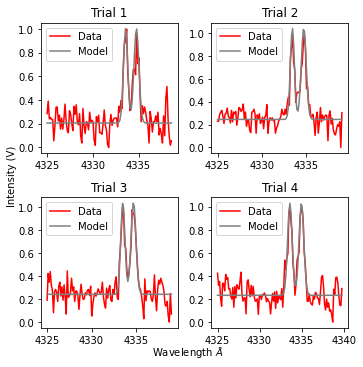

In [ ]:
def line_plotter_with_models_H2(data_frame_list, trial_names, legend_info, model, mu_list_1, mu_list_2): 
    #FUNCTION WILL PLOT THE DATA AND MODELS AND RETURN ERROR INFORMATION

    fig, axs = plt.subplots(2,2, figsize = (5,5)) #create a subplot of two plots if there are only 4 data frames associated with a 
    #normalized df_list
    for i in range(len(axs.flat)): 
      #MODEL CONSTRUCTION
      model.set_param_hint('A1', value = 1, min = 0.8, max = 1.1) 
      model.set_param_hint('A2', value = 1, min = 0.8, max = 1.1)
      model.set_param_hint('mu_value1', value = mu_list_1[i], min = 4000, max = 5000)  
      model.set_param_hint('mu_value2', value = mu_list_2[i], min = 4000, max = 5000) 
      model.set_param_hint('c', value = c_guess_H2) 
      model.set_param_hint('sigma_1', value = 0.23, min = 0.2, max = 0.7)
      model.set_param_hint('sigma_2', value = 0.23, min = 0.2, max = 0.7) 
      my_params = model.make_params() 
      my_fit_result_H2 = model.fit(data = data_frame_list[i]["Intensity(V)"].to_numpy(), x = data_frame_list[i]["Marks"].to_numpy(), params = my_params)  
      y_fit_vals_H2 = my_fit_result_H2.eval(x = data_frame_list[i]["Marks"].to_numpy()) 
      print(my_fit_result_H2.fit_report()) 
      print("---------------------------------------------------------------------")

      ax = axs.flat[i]  
      #DATA PLOTTING
      ax.plot(data_frame_list[i]["Marks"], data_frame_list[i]["Intensity(V)"], color = "red")  #plot the full range of data
      
      #MODEL PLOTTING 
      ax.plot(data_frame_list[i]["Marks"].to_numpy(), y_fit_vals_H2, linestyle = "solid", color = "gray")  
      #MODEL ADDITIONAL INFO/ERROR 

      dely = my_fit_result_H2.eval_uncertainty(x = data_frame_list[i]["Marks"].to_numpy(), sigma = 1) 
      #error in the x direction

      #ax.fill_between(x = normalized_H1_df_list[i]["Marks"].to_numpy(), )

      ax.set_title(trial_names[i]) 
      ax.legend(legend_info) 

    fig.text(0.5, 0, r"Wavelength $Å$", ha='center', fontsize = 10) #create an axes title (x)
    fig.text(0, 0.5, r'Intensity (V)', va='center', rotation='vertical', fontsize = 10) #create an axes title (y)  
      #fig.text(0.5, 1, f"Wavelength $Å$ and Intensity (V) with Peak Point Overlay for Hydrogen {wavelength_name} $Å$", ha = 'center', fontsize = 12, fontweight = "medium")
    plt.tight_layout() 


mu_1_list_H2, mu_2_list_H2 = restructure_mu_list(H2_df_mu_list) 
#print(mu_1_list_H2) 
#print(mu_2_list_H2)
c_guess_H2 = get_c(normalized_H2_df_list[0])   
#print(c_guess_H1)
my_userfunc_model_H2 = lm.models.Model(gaussian_model_func) 
line_plotter_with_models_H2(normalized_H2_df_list, trial_nmes, plot_legend_labels, my_userfunc_model_H2, mu_1_list_H2, mu_2_list_H2)


4855.2625
4855.572972972973
4855.424719101124
4855.407407407408
[[Model]]
    Model(gaussian_model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 97
    # variables        = 7
    chi-square         = 0.04289802
    reduced chi-square = 4.7664e-04
    Akaike info crit   = -735.193126
    Bayesian info crit = -717.170149
    R-squared          = 0.98864748
[[Variables]]
    A1:         0.92836516 +/- 0.01766673 (1.90%) (init = 1)
    A2:         0.92029877 +/- 0.01733865 (1.88%) (init = 1)
    mu_value1:  4853.92783 +/- 0.00677891 (0.00%) (init = 4853.875)
    mu_value2:  4855.27249 +/- 0.00696958 (0.00%) (init = 4855.262)
    sigma_1:    0.30696470 +/- 0.00703625 (2.29%) (init = 0.2)
    sigma_2:    0.31934395 +/- 0.00724998 (2.27%) (init = 0.2)
    c:          0.05262382 +/- 0.00237924 (4.52%) (init = 0.217378)
[[Correlations]] (unreported correlations are < 0.100)
    C(A2, sigma_2)        = -0.562
    C(A1, sigma_1)    

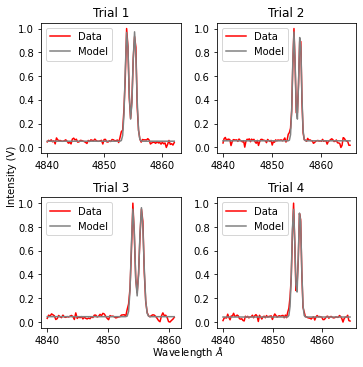

In [ ]:
def line_plotter_with_models_H3(data_frame_list, trial_names, legend_info, model, mu_list_1, mu_list_2): 
    #FUNCTION WILL PLOT THE DATA AND MODELS AND RETURN ERROR INFORMATION

    fig, axs = plt.subplots(2,2, figsize = (5,5)) #create a subplot of two plots if there are only 4 data frames associated with a 
    #normalized df_list
    for i in range(len(axs.flat)): 
      #MODEL CONSTRUCTION
      model.set_param_hint('A1', value = 1, min = 0.5, max = 1.01) 
      model.set_param_hint('A2', value = 1, min = 0.5, max = 1.01)
      model.set_param_hint('mu_value1', value = mu_list_1[i], min = 4000, max = 5000)  
      model.set_param_hint('mu_value2', value = mu_list_2[i], min = 4000, max = 5000) 
      model.set_param_hint('c', value = c_guess_H2) 
      model.set_param_hint('sigma_1', value = 0.2, min = 0.01)
      model.set_param_hint('sigma_2', value = 0.2, min = 0.01) 
      my_params = model.make_params() 
      my_fit_result_H3 = model.fit(data = data_frame_list[i]["Intensity(V)"].to_numpy(), x = data_frame_list[i]["Marks"].to_numpy(), params = my_params)  
      y_fit_vals_H3 = my_fit_result_H3.eval(x = data_frame_list[i]["Marks"].to_numpy()) 
      print(my_fit_result_H3.fit_report())
      print("---------------------------------------------------------------------")

      ax = axs.flat[i]  
      #DATA PLOTTING
      ax.plot(data_frame_list[i]["Marks"], data_frame_list[i]["Intensity(V)"], color = "red")  #plot the full range of data
      
      #MODEL PLOTTING 
      ax.plot(data_frame_list[i]["Marks"].to_numpy(), y_fit_vals_H3, linestyle = "solid", color = "gray")  
      #MODEL ADDITIONAL INFO/ERROR 

      dely = my_fit_result_H3.eval_uncertainty(x = data_frame_list[i]["Marks"].to_numpy(), sigma = 1) 
      #error in the x direction

      #ax.fill_between(x = normalized_H1_df_list[i]["Marks"].to_numpy(), )

      ax.set_title(trial_names[i]) 
      ax.legend(legend_info) 

    fig.text(0.5, 0, r"Wavelength $Å$", ha='center', fontsize = 10) #create an axes title (x)
    fig.text(0, 0.5, r'Intensity (V)', va='center', rotation='vertical', fontsize = 10) #create an axes title (y)  
      #fig.text(0.5, 1, f"Wavelength $Å$ and Intensity (V) with Peak Point Overlay for Hydrogen {wavelength_name} $Å$", ha = 'center', fontsize = 12, fontweight = "medium")
    plt.tight_layout() 

 
mu_1_list_H3, mu_2_list_H3 = restructure_mu_list(H3_df_mu_list)  
my_userfunc_model_H3 = lm.models.Model(gaussian_model_func) 
line_plotter_with_models_H3(normalized_H3_df_list, trial_nmes, plot_legend_labels, my_userfunc_model_H3, mu_1_list_H3, mu_2_list_H3)

##2: Obtaining Wavelength Uncertainty

##3: Calculating the mass of a neutron 

To derive the equation for the mass of a neutron, we begin with the following relation between the speed of light, the energy of a hydrogenic atom, and the mass of that same hydrogenic atom: 

\begin{equation} 
E_H = c\mu_H \\
E_D = c\mu_D
\end{equation} 

Subtracting the former energy relation from the latter and dividing by the former, we obtain: 
\begin{equation}  
\frac{E_D - E_H}{E_H} = \frac{c(\mu_D - \mu_H)}{c \mu_H}.
\end{equation}

If we then assume that the right-hand side of the above equation is equal to 

\begin{equation} 
\frac{h \nu_D - h \nu_H}{h \nu_H},
\end{equation} 

which comes from $E = \nu h$ where $\nu$ is frequency and $h$ is Planck's constant. Let $\Delta \nu = \nu_D - \nu_H$. If we recall that $dc = d(\lambda \nu)$, then we use the product rule to obtain 

\begin{equation} 
\frac{-d \lambda}{\lambda} = \frac{d \nu}{\nu} \\
\frac{|\Delta \lambda|}{\lambda_H} = \frac{\Delta \nu}{\nu h} \\\
\frac{|\Delta \lambda|}{\lambda_H} ≈ \frac{\mu_D - \mu_H}{\mu_H}.
\end{equation}

If $M_n$ is the neutron mass and the neutron mass is equal to the mass of hydrogen minus the mass of deuterium 

\begin{equation}  
m_n = m_D - m_H,
\end{equation}

it becomes necessary to rearrange the above equation to obtain something of the form $m_D - m_H$ such that we can solve for $M_n$. We begin by writing the above in the form 

\begin{equation} 
\frac{\Delta \lambda}{\lambda_H} = \frac{\mu_D}{\mu_H} - 1, 
\end{equation}

at which point it becomes useful to recal that 

\begin{equation}  
\mu_D = \frac{m_e m_D}{m_e + m_D}
\end{equation} 

and 

\begin{equation}  
\mu_H = \frac{m_e m_P}{m_e + m_P}
\end{equation} 

where $m_P$ is proton mass, $m_e$ is electron mass, and $m_D$ is deuterium mass. 

If we plug these reduced mass expressions in, we obtain  

\begin{equation} 
\frac{\Delta \lambda}{\lambda_H} = \frac{m_e m_D}{m_e + m_D} \frac{m_e + m_P}{m_e m_P} - 1 
\end{equation}

which reduces to 


\begin{equation} 
= \frac{m_e}{m_p} + \frac{m_e}{m_P + m_n} -1 
\end{equation}

when we substitute in for m_D. Note that our equation then reduces to 

\begin{equation}
\left( \frac{\Delta \lambda}{\lambda m_e} + \frac{1}{m_e} - \frac{1}{m_P}= \frac{1}{m_P + m_n}\right) 
\end{equation}. 

Our final result is then the following: 

\begin{equation}
m_n = \frac{m_e}{ \frac{\Delta \lambda}{\lambda_H} + 1 - \frac{m_e}{m_P}} -m_P 
\end{equation}

QUESTION: +m_p?

Thus, to calculate the mass of a neutron, we will need the following: 
\begin{equation} 
m_p, m_e, \Delta \lambda,\lambda 
\end{equation} 
for some $\lambda$ of hydrogen measured. m_e, m_p can be looked up online whereas we know $\Delta\lambda$ and $\lambda$ from our analysis of where the wavelength peaks occur. 




In [ ]:
#Getting delta lambda for each data frame (12 total) 
#print(H1_df_mu_list) #contains four sublists of len 2 with a deuterium wavelength and a hydrogen peak value
H1_delta_lambdas = [] 
for i in range(len(H1_df_mu_list)): 
  H1_delta_lambdas.append(get_delta_lambda(H1_df_mu_list[i])) #we should end up with a list of len 4 with 4 delta lambdas for 6564.7 Hydrogen wavelength 

H2_delta_lambdas = [] 
for i in range(len(H2_df_mu_list)): 
  H2_delta_lambdas.append(get_delta_lambda(H2_df_mu_list[i])) #four values for 4341.7 Hydrogen wavelength

H3_delta_lambdas = [] 
for i in range(len(H3_df_mu_list)): 
  H3_delta_lambdas.append(get_delta_lambda(H3_df_mu_list[i])) #four values for 4862.7 Hydrogen wavelength 


def calculate_neutron_mass(target_wavelength: float, delta_lambda: float) -> float: 
  m_e = 9.1093837 * 10 **-31 #kg 
  m_P = 1.67262192 * 10 ** -27 #kg 
  m_n_denom = ((delta_lambda/target_wavelength) + 1 - (m_e/m_P)) 
  
  m_n = (m_e / m_n_denom) + m_P  
  return m_n

H1_neutron_mass_vals = [] #kg
for i in range(len(H1_delta_lambdas)):
  H1_neutron_mass_vals.append(calculate_neutron_mass(mu_2_list_H1[i], H1_delta_lambdas[i]))  
print(H1_neutron_mass_vals)

H2_neutron_mass_vals = [] 
for i in range(len(H2_delta_lambdas)):
  H2_neutron_mass_vals.append(calculate_neutron_mass(mu_2_list_H2[i], H2_delta_lambdas[i]))   
print(H2_neutron_mass_vals)

H3_neutron_mass_vals = [] 
for i in range(len(H3_delta_lambdas)):
  H3_neutron_mass_vals.append(calculate_neutron_mass(mu_2_list_H3[i], H3_delta_lambdas[i]))   
print(H2_neutron_mass_vals)

[1.673533127318231e-27, 1.673533107146535e-27, 1.6735330980787043e-27, 1.6735331002114614e-27]
[1.673533122831471e-27, 1.673533075546592e-27, 1.6735331282401463e-27, 1.6735330741196122e-27]
[1.673533122831471e-27, 1.673533075546592e-27, 1.6735331282401463e-27, 1.6735330741196122e-27]


## Uncertainty in hydrogen peaks, delta lambda, and neutron mass: 

To find the uncertainty in $\lambda$ and $\Delta \lambda$ for hydrogen and deuterium peaks peaks, we need to calculate an average value for 
$\lambda_{3 \rightarrow 2} = 6561.1 Å $,
$\lambda_{4 \rightarrow 2} = 4860.1 Å $, and
$\lambda_{5 \rightarrow 2} = 4339.4 Å$ using the equation 
<center>
$\bar{\lambda} = \frac{\sum_{i=1}^{4} \lambda_i}{4}$  
</center> 

and repeat for deuterium peaks. $\lambda_i$ corresponds to one of the above wavelengths. The value for the uncertainty, $\sigma_{\lambda}$ is then determined using 

<center> 
$\sigma_{\lambda} = \frac{s}{\sqrt{N}}$
</center>

 where N is the number of trials for a given wavelength (always 4) and s is the standard deviation of the data. We again repeat for deuterium peaks. To then cacluate uncertainty in $\Delta \lambda$, we can subtract the uncertainties from each other for hydrogen and deuterium for each wavelength. When we calculate the uncertainty for 

<center>
$\frac{\Delta \lambda}{\lambda}$  
</center> 

to propogate to our uncertainty in m_n. We rewrite this as 

<center>
$f = \Delta \lambda \lambda^{-1}$ <br>
$\sigma_{m_n} = \sqrt{ \left( \frac{\partial{f}}{\partial{\lambda}} \right)^2 \sigma_{\lambda}^2 + \left( \frac{\partial{f}}{\partial{\Delta \lambda}} \right)^2 \sigma_{\Delta \lambda}^2}.$  

$= \sqrt{ \left( \frac{-\Delta \lambda}{\lambda^2} \right)^2 \sigma_{\lambda}^2 + \left( \frac{1}{\lambda} \right)^2 \sigma_{\Delta \lambda}^2}.$  

We say that this is our uncertainty in neutron mass because no other values in our neutron mass calculations carry known uncertainties. 


In [ ]:
#print(mu_2_list_H1) #hydrogen wavelengths trial 1
#print(mu_2_list_H2) #hydrogen wavelengths trial 2
#print(mu_2_list_H3) #hydrogen wavelengths trial 3 
print("-------------------------------------------")
#print(mu_1_list_H1) #deuterium wavelengths trial 1
#print(mu_1_list_H2) #deuterium wavelengths trial 2
#print(mu_1_list_H3) #deuterium wavelengths trial 3

def avg_calculator(list_of_peak_vals: list): 
  return np.mean(list_of_peak_vals) 

avg_h_wavelength_lambda_1 = avg_calculator(mu_2_list_H1) #angstroms  
print(f"best value lambda_1 is {avg_h_wavelength_lambda_1}")
avg_h_wavelength_lambda_2 = avg_calculator(mu_2_list_H2) #angstroms 
print(f"best value lambda_2 is {avg_h_wavelength_lambda_2}")
avg_h_wavelength_lambda_3 = avg_calculator(mu_2_list_H3) #angstroms 
print(f"best value lambda_3 is {avg_h_wavelength_lambda_3}") 

avg_deut_wavelength_lambda_1 = avg_calculator(mu_1_list_H1) #angstroms
avg_deut_wavelength_lambda_2 = avg_calculator(mu_1_list_H2)#angstroms
avg_deut_wavelength_lambda_3= avg_calculator(mu_1_list_H3) #angstroms 

def sigma_lambda_calculator(list_of_peak_vals: list): 
  return np.std(list_of_peak_vals, ddof = 1)/np.sqrt(len(list_of_peak_vals)) 

sigma_lambda_h_1 = sigma_lambda_calculator(mu_2_list_H1) 
print(sigma_lambda_h_1)
sigma_lambda_h_2 = sigma_lambda_calculator(mu_2_list_H2) 
print(sigma_lambda_h_2)
sigma_lambda_h_3 = sigma_lambda_calculator(mu_2_list_H3) 
print(sigma_lambda_h_3)

sigma_lambda_deut_1 = sigma_lambda_calculator(mu_1_list_H1) 
sigma_lambda_deut_2 = sigma_lambda_calculator(mu_1_list_H2) 
sigma_lambda_deut_3 = sigma_lambda_calculator(mu_1_list_H3) 



def calculate_delta_lambda_uncertainty(deut_uncertainty:int, h_uncertainty:int): 
  return np.abs(h_uncertainty - deut_uncertainty) 

delta_lambda_uncertainty_lambda_1 = calculate_delta_lambda_uncertainty(sigma_lambda_deut_1, sigma_lambda_h_1) 
print(f"delta uncertainty for lambda 1 is {delta_lambda_uncertainty_lambda_1 }")
delta_lambda_uncertainty_lambda_2 = calculate_delta_lambda_uncertainty(sigma_lambda_deut_2, sigma_lambda_h_2) 
print(f"delta uncertainty for lambda 2 is {delta_lambda_uncertainty_lambda_2 }")
delta_lambda_uncertainty_lambda_3 = calculate_delta_lambda_uncertainty(sigma_lambda_deut_3, sigma_lambda_h_3)  
print(f"delta uncertainty for lambda 3 is {delta_lambda_uncertainty_lambda_3 }") 
print("----------------------------------------------------------------")

best_value_delta_lambda_1 = np.mean(np.array(mu_2_list_H1) - np.array(mu_1_list_H1))  
print(f"best val delta lambda 1 is {best_value_delta_lambda_1}")
best_value_delta_lambda_2 = np.mean(np.array(mu_2_list_H2) - np.array(mu_1_list_H2))  
print(f"best val delta lambda 2 is {best_value_delta_lambda_2}")
best_value_delta_lambda_3 = np.mean(np.array(mu_2_list_H3) - np.array(mu_1_list_H3))   
print(f"best val delta lambda 3 is {best_value_delta_lambda_3}")

def m_n_uncertainty(delta_lambda_uncertainty, lambda_uncertainty, delta_lambda, lambda_val):  
  #we are only considering lambda's that correspond to hydrogen because this is what is used in our final m_n calculation  
  #print(delta_lambda_uncertainty) 
  #print(lambda_uncertainty) 
  #print(delta_lambda) 
  #print(lambda_val) 

  print(-((lambda_val/(delta_lambda**2))**2))
  first_sqrt_term = ((-delta_lambda/(lambda_val**2))**2) * (lambda_uncertainty)**2  
  #uncertainty mostly due to how big our lambda value is
  print(first_sqrt_term)
  print(f"first sqrt term value is {first_sqrt_term}") 
  second_sqrt_term = ((1/lambda_val)**2) * (delta_lambda_uncertainty)**2  
  print(f"second_sqrt_term is {second_sqrt_term}") 
  return np.sqrt(first_sqrt_term + second_sqrt_term) 

m_n_uncertainty_1 = m_n_uncertainty(delta_lambda_uncertainty_lambda_1, sigma_lambda_h_1, best_value_delta_lambda_1, avg_h_wavelength_lambda_1) 
print(m_n_uncertainty_1) 
print("------------------------------------")
m_n_uncertainty_2 = m_n_uncertainty(delta_lambda_uncertainty_lambda_2, sigma_lambda_h_2, best_value_delta_lambda_2, avg_h_wavelength_lambda_2)  
print(m_n_uncertainty_2)
print("------------------------------------")
m_n_uncertainty_3 = m_n_uncertainty(delta_lambda_uncertainty_lambda_3, sigma_lambda_h_3, best_value_delta_lambda_3, avg_h_wavelength_lambda_3)
print(m_n_uncertainty_3)
print("------------------------------------") 

#best values for m_n 

print(f"best value m_n_1 = {np.mean(H1_neutron_mass_vals)}")
print(f"best value m_n_2 = {np.mean(H2_neutron_mass_vals)}") 
print(f"best value m_n_3 = {np.mean(H3_neutron_mass_vals)}")

#alternative approach to calculating uncertainty: 

print(f"alt uncertainty m_n_1 = {(np.std(H1_neutron_mass_vals, ddof = 1))/np.sqrt(len(H1_neutron_mass_vals))}") 
print(f"alt uncertainty m_n_2 = {(np.std(H2_neutron_mass_vals, ddof = 1))/np.sqrt(len(H2_neutron_mass_vals))}") 
print(f"alt uncertainty m_n_3 = {(np.std(H3_neutron_mass_vals, ddof = 1))/np.sqrt(len(H3_neutron_mass_vals))}")

-------------------------------------------
best value lambda_1 is 6557.226163747579
best value lambda_2 is 4334.774463606756
best value lambda_3 is 4855.416899870376
0.04308087674532719
0.07715461497584515
0.06347531052114272
delta uncertainty for lambda 1 is 0.030373891163003514
delta uncertainty for lambda 2 is 0.02035279469518475
delta uncertainty for lambda 3 is 0.053400460919219045
----------------------------------------------------------------
best val delta lambda 1 is 1.773395528956371
best val delta lambda 2 is 1.2104095540078106
best val delta lambda 3 is 1.2842736345894536
-4347282.764660597
3.157182103305723e-18
first sqrt term value is 3.157182103305723e-18
second_sqrt_term is 2.1456581901544945e-11
4.63212532847796e-06
------------------------------------
-8753941.509356653
2.4701451715620244e-17
first sqrt term value is 2.4701451715620244e-17
second_sqrt_term is 2.2045253187566995e-11
4.695239918153141e-06
------------------------------------
-8666081.796686102
1.19569

In [ ]:
#uncertainty in m_n